In [1]:
from abc import ABC, abstractmethod
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def loadWWSteel():
    df = pd.read_csv("../../datasets/other_industry/steel_all_countries.csv", sep =";", low_memory=False, usecols = ["Date", "United States", "Brazil", "India", "Japan", "EU", "World", "Russia", "Canada", "China"], thousands='.', decimal=",")
    df['Date'] = pd.to_datetime(df['Date'], format="%Y%m")
    return df

def loadUSSteel():
    df = pd.read_csv("../../datasets/other_industry/steel_USA.csv", sep =";", low_memory=False, thousands='.', decimal=",")
    df['DATE'] = pd.to_datetime(df['DATE'])
    return df

In [2]:
def plotUSsteel(dfUS):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(dfUS['DATE'], dfUS["Steel production"]/np.mean(dfUS["Steel production"]))
    plt.ylabel("Steel Production of the US Normalized by Mean")
    plt.xlabel("Year")
    plt.show()
    fig = ax.get_figure()
    fig.savefig("../../results/predictions/steelUS.pdf", bbox_inches='tight')
    return fig, ax

def plotUSsteel_adjusted(dfUS):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(dfUS['DATE'], dfUS["Steel production"]/np.mean(dfUS["Steel production"]))
    plt.ylabel("Seasonally Adjusted Steel Production of the US Normalized by Mean")
    plt.xlabel("Year")
    plt.show()
    fig = ax.get_figure()
    fig.savefig("../../results/predictions/steelUS_seasonadjusted.pdf", bbox_inches='tight')
    return fig, ax

def plotWWsteel(df):
    countries = df.columns[1:-1].to_numpy()

    fig, ax = plt.subplots(figsize=(6, 4))
    diff = dict()
    perc = dict()
    for country in countries:
        #fig, ax = plt.subplots(figsize=(10, 10))
        ax.plot(df['Date'].dt.strftime('%m') + "-" + df['Date'].dt.strftime('%y'), df[country]/np.max(df[country]), label = country)

    plt.ylabel("Steel Production Normalized by Maximum")
    plt.xlabel("Month - Year")
    plt.setp(ax.get_xticklabels()[1::2], visible=False)
    ax.legend()
    plt.show()
    fig = ax.get_figure()
    fig.savefig("../../results/predictions/steelAllCountries.pdf", bbox_inches='tight')
    return fig, ax

def plotWWsteel_adjusted(df):
    countries = df.columns[1:-1].to_numpy()

    fig, ax = plt.subplots(figsize=(6, 4))
    diff = dict()
    perc = dict()
    for country in countries:
        #fig, ax = plt.subplots(figsize=(10, 10))
        ax.plot(df['Date'].dt.strftime('%m') + "-" + df['Date'].dt.strftime('%y'), df[country]/np.max(df[country]), label = country)

    plt.ylabel("Seasonally Adjusted Steel Production Normalized by Maximum")
    plt.xlabel("Month - Year")
    plt.setp(ax.get_xticklabels()[1::2], visible=False)
    ax.legend()
    plt.show()
    fig = ax.get_figure()
    fig.savefig("../../results/predictions/steelAllCountries_seasonadjusted.pdf", bbox_inches='tight')
    return fig, ax
    
def vector(df):
    countries = df.columns[1:-1].to_numpy()
    perc = dict()
    for country in countries:
        prod_early2019 = df.loc[0:5,country].to_numpy()
        prod_early2020 = df.loc[12:17,country].to_numpy()
        perc[country] = prod_early2020/prod_early2019
    return perc

def plotvector(perc):
    countries = df.columns[1:-1].to_numpy()
    fig, ax = plt.subplots(figsize=(6, 4))
    early_year = ["January", "February", "March", "April", "May", "June"]
    for country in countries:
        #fig, ax = plt.subplots(figsize=(10, 10))
        ax.plot(early_year, perc[country], label = country)

    ax.legend()
    plt.ylabel("Ratio of Steel Production in 2020 and in 2019")
    plt.xlabel("Months in Early 2020")
    plt.show()
    fig = ax.get_figure()
    fig.savefig("../../results/predictions/otherindustries_notadjusted.pdf", bbox_inches='tight')
    return fig, ax

def plotvector_adjusted(perc):
    countries = df.columns[1:-1].to_numpy()
    fig, ax = plt.subplots(figsize=(6, 4))
    early_year = ["January", "February", "March", "April", "May", "June"]
    for country in countries:
        #fig, ax = plt.subplots(figsize=(10, 10))
        ax.plot(early_year, perc[country], label = country)

    ax.legend()
    plt.ylabel("Ratio of Steel Production in 2020 and in 2019")
    plt.xlabel("Months in Early 2020")
    plt.show()
    fig = ax.get_figure()
    fig.savefig("../../results/predictions/otherindustries_adjusted.pdf", bbox_inches='tight')
    return fig, ax

In [3]:
#function multiplies all the values in data(except first column) with seasonality (which is a list with a length of 12, should start with january)
def adjust_seasonality(seasonality, data):
    start_index = data.iloc[:,0][0].month - 1
    s = seasonality[start_index:] + seasonality[:start_index]
    s = np.array(((len(data) // 12 + 1) * s)[:len(data)])
    for col in data.columns[1:]:
        data[col] = data[col].to_numpy() * s

In [4]:
#calculate the seasonality here

dfUS = loadUSSteel()
yearly_means = np.array([dfUS['Steel production'].to_numpy()[x-6:x+6].mean() for x in range(6, len(dfUS)-6)]) / dfUS['Steel production'][6:-6].to_numpy()
yearly_means = yearly_means[:len(yearly_means) - (len(yearly_means)%12)]
seasonality = [x.mean() for x in yearly_means.reshape((12, -1), order='F')]
starting_month = dfUS['DATE'][6].month
jan_index = (1 - starting_month) % 12
seasonality = seasonality[jan_index:] + seasonality[:jan_index]
seasonality

[0.995221430534065,
 0.9927880263235764,
 0.9891183343455636,
 0.9899682585496442,
 0.9998330195725844,
 1.013690145643193,
 1.0147549531099127,
 1.0058437498891557,
 1.0083704783576428,
 1.0167006406718917,
 0.9815220104809557,
 1.0027893048848158]

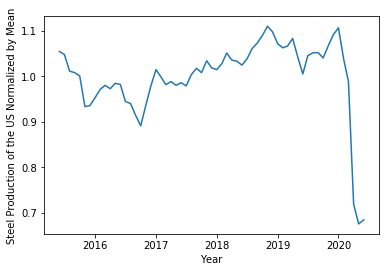

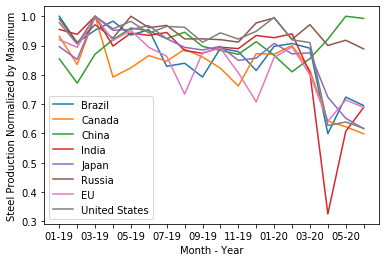

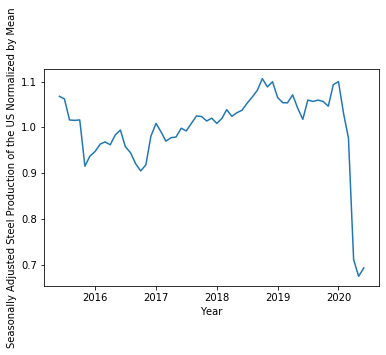

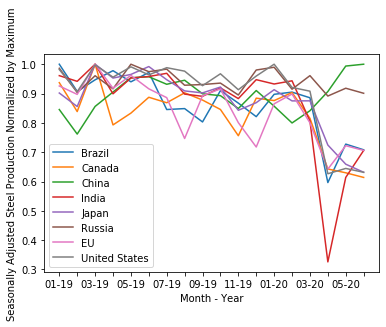

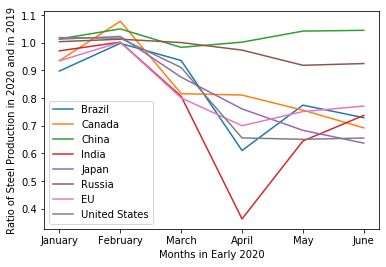

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14afb489c08>)

In [5]:
df = loadWWSteel()
dfUS = loadUSSteel()

plotUSsteel(dfUS)
plotWWsteel(df)

adjust_seasonality(seasonality, dfUS)
plotUSsteel_adjusted(dfUS)

adjust_seasonality(seasonality, df)
plotWWsteel_adjusted(df)

perc = vector(df)
perc_df = pd.DataFrame.from_dict(perc)
perc_df.to_csv('../../results/other_industries/predicted_vector.csv')
plotvector_adjusted(perc)

In [6]:
# use stuff above, rest is old. still need to cleanup!

In [ ]:
countries = df.columns[1:-1].to_numpy()

fig, ax = plt.subplots(figsize=(6, 4))
diff = dict()
perc = dict()
for country in countries:
    #fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(df['Date'].dt.strftime('%m') + "-" + df['Date'].dt.strftime('%y'), df[country]/np.max(df[country]), label = country)
    
    prod_early2019 = df.loc[0:5,country].to_numpy()
    prod_early2020 = df.loc[12:17,country].to_numpy()
    diff[country] = prod_early2020-prod_early2019
    perc[country] = prod_early2020/prod_early2019
    
    
plt.ylabel("Steel Production Normalized by Maximum")
plt.xlabel("Month - Year")
plt.setp(ax.get_xticklabels()[1::2], visible=False)
ax.legend()
plt.show()
fig = ax.get_figure()
fig.savefig("../../results/predictions/steelAllCountries.pdf", bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
early_year = ["January", "February", "March", "April", "May", "June"]
for country in countries:
    #fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(early_year, perc[country], label = country)

ax.legend()
plt.ylabel("Ratio of Steel Production in 2020 and in 2019")
plt.xlabel("Months in Early 2020")
plt.show()
fig = ax.get_figure()
fig.savefig("../../results/predictions/otherindustries_notadjusted.pdf", bbox_inches='tight')

In [ ]:
df = loadWWSteel()
dfUS = loadUSSteel()
plotUSsteel(dfUS)
plotWWsteel(df)
perc = vector(df)
plotvector(perc)

In [ ]:
perc_df = pd.DataFrame.from_dict(perc)
perc_df.to_csv('../../results/other_industries/predicted_vector.csv')